<h3> The dataset contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region.

|Attribute|Description|
|:--|:--|
|Time	  |Time of the readings, with a time span of 1 min. |
|Use [kW] |Total energy consumption |
|Gen [kW] |Total energy generated by means of solar |
|House overall [kW]|Overall house energy consumption|
|Fridge [kW]|Energy consumed by specific appliance|
|Wine cellar [kW]|
|Garage door [kW]|
|Dishwasher [kW]|
|Furnace 1 [kW]|
|Furnace 2 [kW]|
|Home office [kW]|
|Barn [kW]|
|Well [kW]|
|Living room [kW]|
|Kitchen 12 [kW]|
|Kitchen 14 [kW]|
|Kitchen 38 [kW]|
|Microwave [kW]|
|Solar [kW]|Solar power generation|
|Temperature [(°C)]|Temperature is a physical quantity expressing hot and cold.|
|Icon|The icon that is used by the data collection system|
|Humidity|Humidity is the concentration of water vapour present in air.|
|Visibility [metres]|Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.|
|Summary|Report generated by data collection system|
|ApparentTemperature|Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.|
|pressure |Air pressure. Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather|
|WindSpeed [km/h]|Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.|
|CloudCover [Okta]|Cloud cover refers to the fraction of the sky obscured by clouds.|
|windBearing|In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings".|
|dewPoint|The atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.|
|PrecipProbability|A probability of precipitation|
|PrecipIntensity [mm/h]|The intensity of rainfall is a measure of the amount of rain that falls over time.|

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the data

In [3]:
#reading the dataset
df=pd.read_csv('HomeC.csv')

In [4]:
df.shape

(503911, 32)

In [5]:
df.head(3)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [6]:
#Removing [kW] from column names
df.columns = [feature.replace(' [kW]', '') for feature in df.columns]
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [7]:
df.describe()

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   House overall        503910 non-null  float64
 4   Dishwasher           503910 non-null  float64
 5   Furnace 1            503910 non-null  float64
 6   Furnace 2            503910 non-null  float64
 7   Home office          503910 non-null  float64
 8   Fridge               503910 non-null  float64
 9   Wine cellar          503910 non-null  float64
 10  Garage door          503910 non-null  float64
 11  Kitchen 12           503910 non-null  float64
 12  Kitchen 14           503910 non-null  float64
 13  Kitchen 38           503910 non-null  float64
 14  Barn                 503910 non-null  float64
 15  Well             

In [9]:
#function to understand dataset 

def understand_data(data) :
    
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.nunique(axis=0,dropna=True),
                         "Levels": data.apply(lambda x: str(x.unique()),axis=0)}))
understand_data(df)

,Datatype,No of NAs,No of Levels,Levels
time,object,0,503911,[1451624400 1451624401 1451624402 ... '1452128...
use,float64,1,130103,[0.93283333 0.93433333 0.93181667 ... 1.551816...
gen,float64,1,29904,[0.00348333 0.00346667 0.00343333 ... 0.1532 ...
House overall,float64,1,130103,[0.93283333 0.93433333 0.93181667 ... 1.551816...
Dishwasher,float64,1,9595,[3.33000000e-05 0.00000000e+00 1.67000000e-05 ...
Furnace 1,float64,1,28755,[0.0207 0.02071667 0.1069 ... 0.189716...
Furnace 2,float64,1,28700,[0.06191667 0.06381667 0.06231667 ... 0.5292 ...
Home office,float64,1,23272,[0.44263333 0.44406667 0.44606667 ... 0.233166...
Fridge,float64,1,13986,[0.12415 0.124 0.12353333 ... 0.060083...
Wine cellar,float64,1,10738,[0.00698333 0.00685 0.00671667 ... 0.05885 ...


- continuous data except for three attributes,  - icon, summary and cloudcover which are categorical
- time has discrete data
- Cloud seems to be wrongly read as object. Missing values are entered as 'cloudCover'.
- One row of missing value in the entire dataset.
- The column 'time' is in unix timestamp. Convert the timestamp to date and time.

In [10]:
#Furnace1 and Furnace2 columns can be combined
df['Furnace']=df[['Furnace 1','Furnace 2']].sum(axis=1)

In [11]:
df.drop(['Furnace 1','Furnace 2'],axis=1,inplace=True)

In [12]:
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12', 'Kitchen 14',
       'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar',
       'temperature', 'icon', 'humidity', 'visibility', 'summary',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace'],
      dtype='object')

In [13]:
#Kitchen 12, Kitchen 14, and Kitchen 38 can be combined
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [14]:
df.drop(['Kitchen 12','Kitchen 14','Kitchen 38'],axis=1,inplace=True)

In [15]:
df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

The column 'time' is in unix timestamp. Convert the timestamp to date and time.

In [16]:
import time
#Finding the start time
start_time=time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(df['time'].iloc[0])))

In [17]:
#Converting the unix timestamp values in the column 'time' to a readable date format
#Setting freq= 'min' since readings are being taken in a time span of one min
time_index = pd.date_range(start_time, periods=len(df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)

In [18]:
df.head(3)

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2016-01-01 10:30:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.082617,0.000567
2016-01-01 10:31:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.084533,0.000567
2016-01-01 10:32:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.083017,0.000617


In [19]:
#Checking whether use and House overall columns are same
df['use'].equals(df['House overall'])

True

In [20]:
#Therefore one can be dropped
df=df.drop(['House overall'], axis=1)

In [21]:
#Checking whether gen and Solar columns are same
df['gen'].equals(df['Solar'])

True

In [22]:
#Therefore one can be dropped
df=df.drop(['Solar'], axis=1)

In [23]:
df.rename(columns={'use':'Used','gen':'Generated'}, inplace=True)
df.columns

Index(['Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

In [24]:
df['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow', nan], dtype=object)

In [25]:
df['icon'].unique()

array(['clear-night', 'partly-cloudy-night', 'clear-day', 'cloudy',
       'partly-cloudy-day', 'rain', 'snow', 'wind', 'fog', nan],
      dtype=object)

# Removing Null Values

In [26]:
df.isna().sum()

Used                   1
Generated              1
Dishwasher             1
Home office            1
Fridge                 1
Wine cellar            1
Garage door            1
Barn                   1
Well                   1
Microwave              1
Living room            1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
Furnace                0
Kitchen                0
dtype: int64

In [27]:
df=df.dropna()

In [28]:
df.isna().sum()

Used                   0
Generated              0
Dishwasher             0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Barn                   0
Well                   0
Microwave              0
Living room            0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
Furnace                0
Kitchen                0
dtype: int64

In [29]:
df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [30]:
df[df['cloudCover']=='cloudCover'].shape


(58, 26)

In [31]:
#we have to replace this missing values entered as cloudcover with next valid observation 

In [32]:
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')
df['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

# EDA

In [33]:
df.columns

Index(['Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen'],
      dtype='object')

In [34]:
#Seperating Energy and Weather data for convinience

In [35]:

energy_data = df.filter(items=['Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room','Furnace', 'Kitchen' ])
weather_data = df.filter(items=['temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'])

In [36]:
energy_data.head(3)

,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen
2016-01-01 10:30:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567
2016-01-01 10:31:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567
2016-01-01 10:32:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617


# Analysing Energy Data

In [37]:
#Extracting monthly energy consumption from data
#Resampling generates a unique sampling distribution on the basis of the actual data. 
#We can apply various frequency to resample our time series data.
#This is a very important technique in the field of analytics.
#Most commonly used time series frequency are –
#W : weekly frequency
#M : month end frequency
#D : Daily frequency

In [38]:
usage_per_month=energy_data.resample('M').sum()

In [39]:
usage_per_month.head(3)

,Used,Generated,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen
2016-01-31,45655.020833,2592.055150,1613.542396,4030.331333,2398.760417,838.494283,600.450150,3253.956117,758.296735,413.986650,1893.629750,20194.149350,450.987563
2016-02-29,41730.147800,2685.731933,1336.789982,2829.151067,2239.769667,825.227383,572.250633,2866.165700,738.614150,400.464667,1411.385517,19194.797950,421.593884
2016-03-31,34172.645333,3799.038417,1568.830212,3517.769300,2400.461100,1261.435533,614.638367,1691.605033,741.759083,425.066900,1592.917383,13044.044667,404.460058


# Analysing energy consumption by each Room/Appliance per month 

In [40]:
usage_per_month.columns

Index(['Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen'],
      dtype='object')

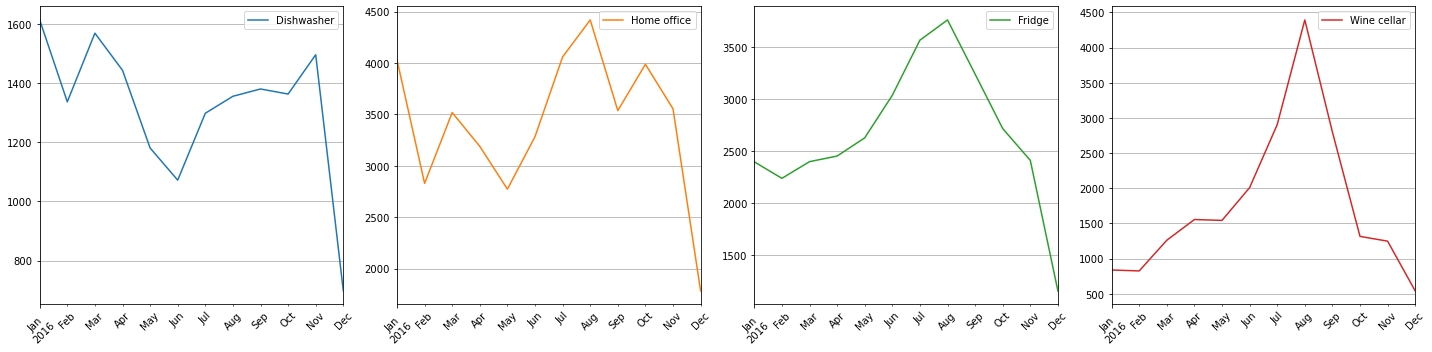

In [41]:
usage_per_month[usage_per_month.columns[2:6].tolist()].plot(subplots=True, layout=(1, 4), figsize=(20, 5),
                                                                grid=True, rot=45)
plt.tight_layout()

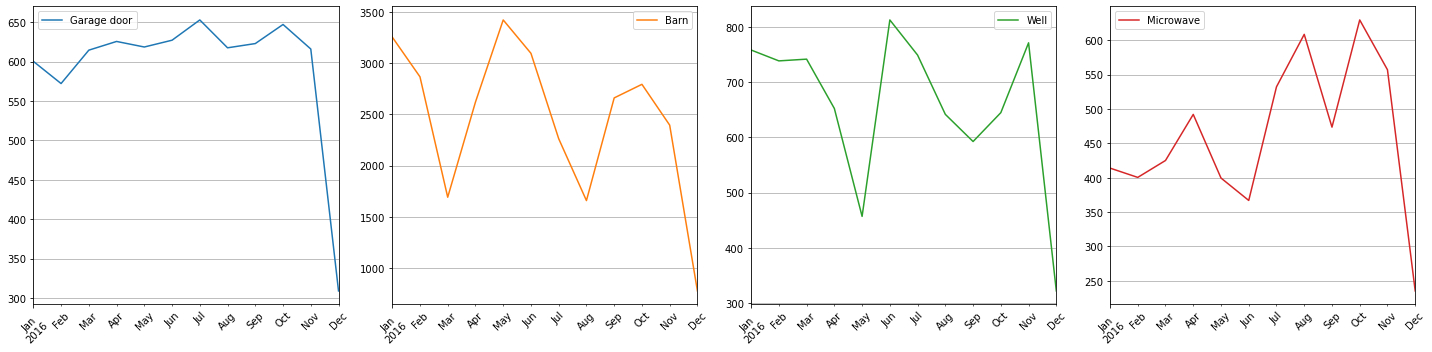

In [42]:
usage_per_month[usage_per_month.columns[6:10].tolist()].plot(subplots=True, layout=(1, 4), figsize=(20, 5),
                                                                grid=True, rot=45)
plt.tight_layout()

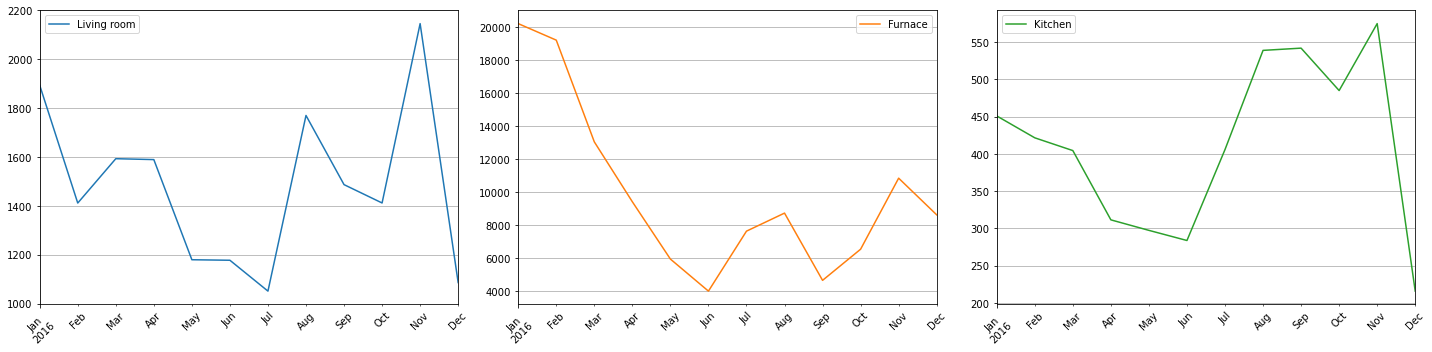

In [43]:
usage_per_month[usage_per_month.columns[10:14].tolist()].plot(subplots=True, layout=(1, 3), figsize=(20, 5),
                                                                grid=True, rot=45)
plt.tight_layout()

- Furnace which is used to heat air is used maximum in Jan and Feb and decreases over summer.
- As Expected fridge and wine cellar consumption is higher during the summer months as the ambient temperature is higher during that time.
- Dishwasher,Kitchen,microwave,living rooms are used less during June July months, so probably they are eating out more during summer as weather is better!
- Home office was used most in August.
- We can understand this better when we do a bivariate analysis of these data columns with weather data.

# Comparing overall energy consumption (Used) and Generated solar energy per month

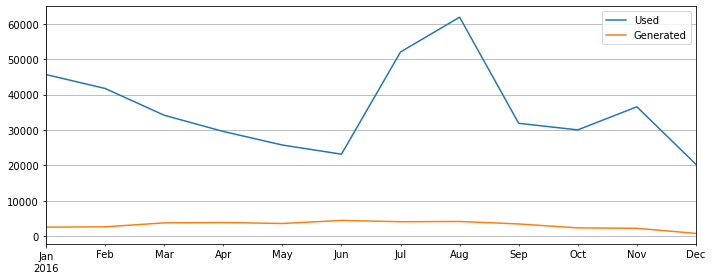

In [44]:
usage_per_month[['Used','Generated']].plot(figsize=(10, 4),grid=True)
plt.tight_layout()

- Generated solar energy stays almost the same through out the year.
- Used energy clearly fluctuates and is much higher than the generated energy.
- Overall energy usage decreases till June and increases thereafter. Usage was at peak in August, then again decreases.

# Home Activity In a Day

In [45]:
#Here to analyse home activity in day we have considered the first day (2015-12-31)

In [46]:
usage_per_month.columns

Index(['Used', 'Generated', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen'],
      dtype='object')

In [47]:
usage_per_month[usage_per_month.columns[2::].tolist()].resample("D").sum().iloc[0]

Dishwasher      1613.542396
Home office     4030.331333
Fridge          2398.760417
Wine cellar      838.494283
Garage door      600.450150
Barn            3253.956117
Well             758.296735
Microwave        413.986650
Living room     1893.629750
Furnace        20194.149350
Kitchen          450.987563
Name: 2016-01-31 00:00:00, dtype: float64

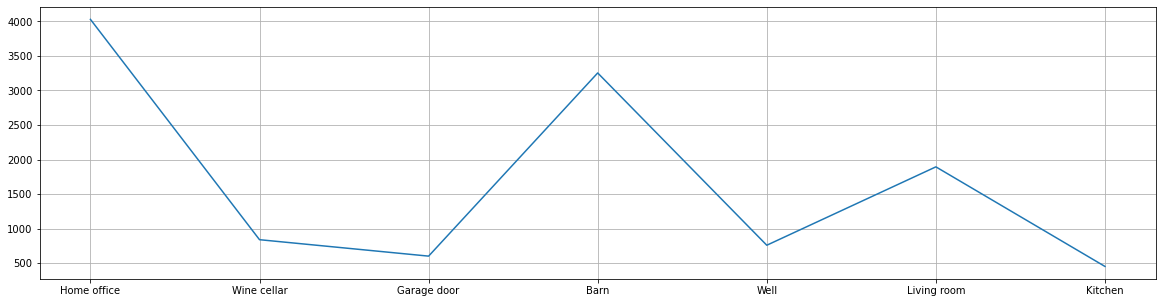

In [48]:
usage_per_month[usage_per_month.columns[2::].tolist()].resample("D").sum().iloc[0].filter(['Home office','Wine cellar', 'Garage door', 'Barn', 'Well','Living room', 'Kitchen']).plot(figsize=(20, 5),grid=True)
plt.show()

- On this day Home office has the highest consumption

# Analysing Weather Data

In [49]:
weather_data.head(3)

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
2016-01-01 10:30:00,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 10:31:00,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 10:32:00,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0


In [50]:
weather_per_month=weather_data.resample('W').mean()

In [51]:
weather_per_month.head(3)

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
2016-01-03,33.165550,0.607393,9.907577,26.477079,1013.173382,7.809117,0.352661,250.655285,0.000035,20.969816,0.000629
2016-01-10,27.019286,0.666798,9.417200,21.662313,1022.951294,5.799462,0.205155,173.569048,0.003527,16.722183,0.051210
2016-01-17,28.514232,0.648587,9.258069,22.282933,1008.768435,7.145008,0.254516,211.482540,0.001529,17.675587,0.036845


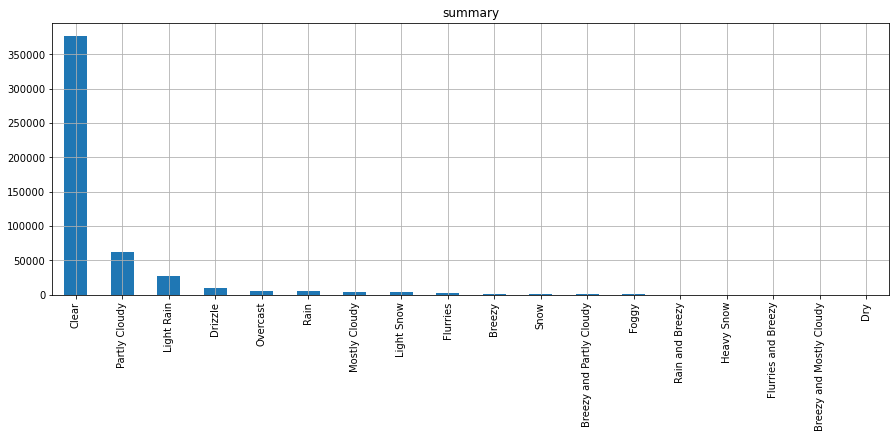

In [52]:
#Plotting categorical columns in weather data. 
#summary
weather_data['summary'].value_counts().plot.bar(subplots=True,figsize=(15, 5),
                                                                grid=True, rot=90)
plt.show()

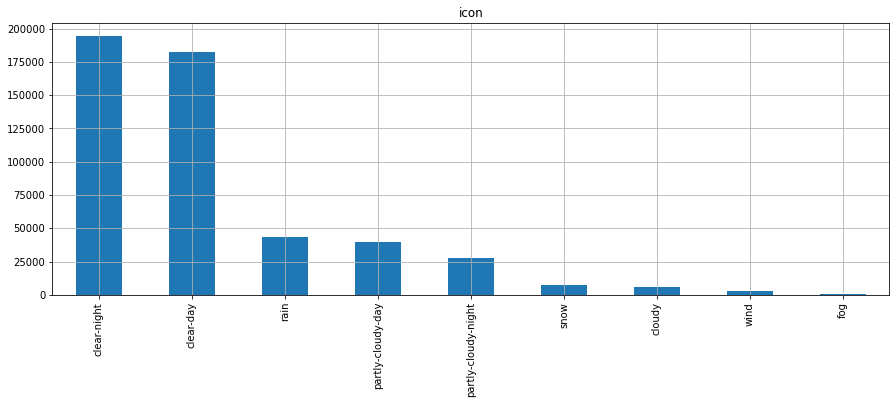

In [53]:
#icon
weather_data['icon'].value_counts().plot.bar(subplots=True,figsize=(15, 5),
                                                                grid=True, rot=90)
plt.show()

<h3> Time series analysis of mean monthly weather data 

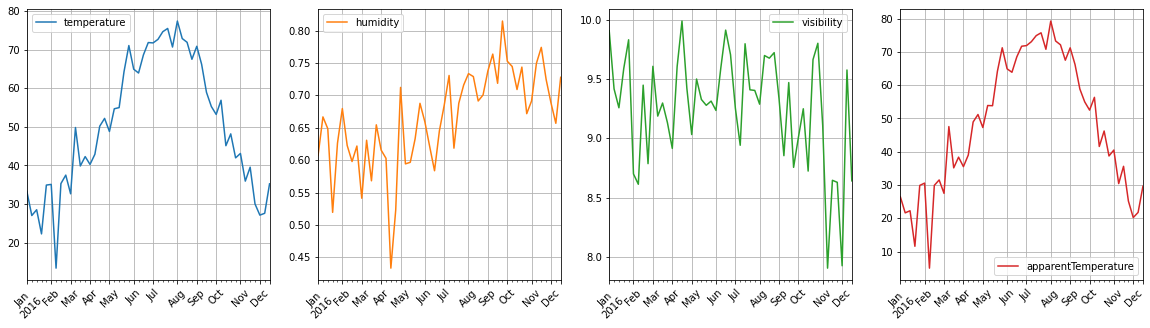

In [54]:
weather_per_month.iloc[:,0:4].plot(subplots=True, layout=(1, 4),grid=True, figsize=(20, 5), rot=45)
plt.show()

- Temperature and apparentTemperature peaks during July and August and lowest during Dec and Jan
- Humidity is highest between September and October.
- Low visibility between November and December.

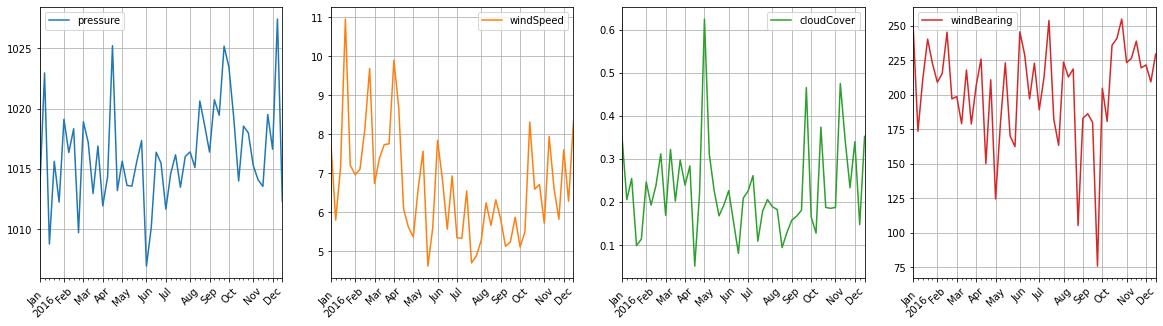

In [55]:
weather_per_month.iloc[:,4:8].plot(subplots=True, layout=(1, 4),grid=True, figsize=(20, 5), rot=45)
plt.show()

- Air pressure is lowest during June, experiencing bad weather. Airpressure peaks August to September, indicating good weather.
- High windSpeed between Jan and Feb and low between July and September.
- Windbearing lowest in October.

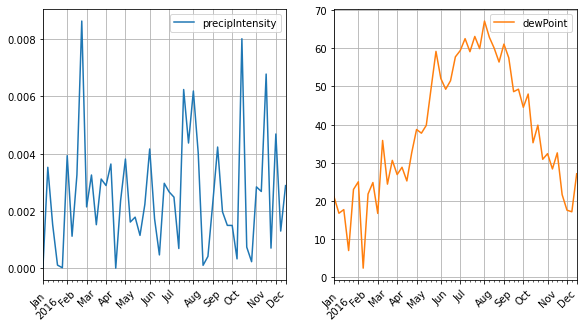

In [56]:
weather_per_month.iloc[:,8:10].plot(subplots=True, layout=(1, 4),grid=True, figsize=(20, 5), rot=45)
plt.show()

- Precipitation intensity highest between Feb and March and then between october an November.
- Dewpoint increases gradually from Jan and peaks during August and gradually falls.

# Distribution of weather observations by using a frequency plots

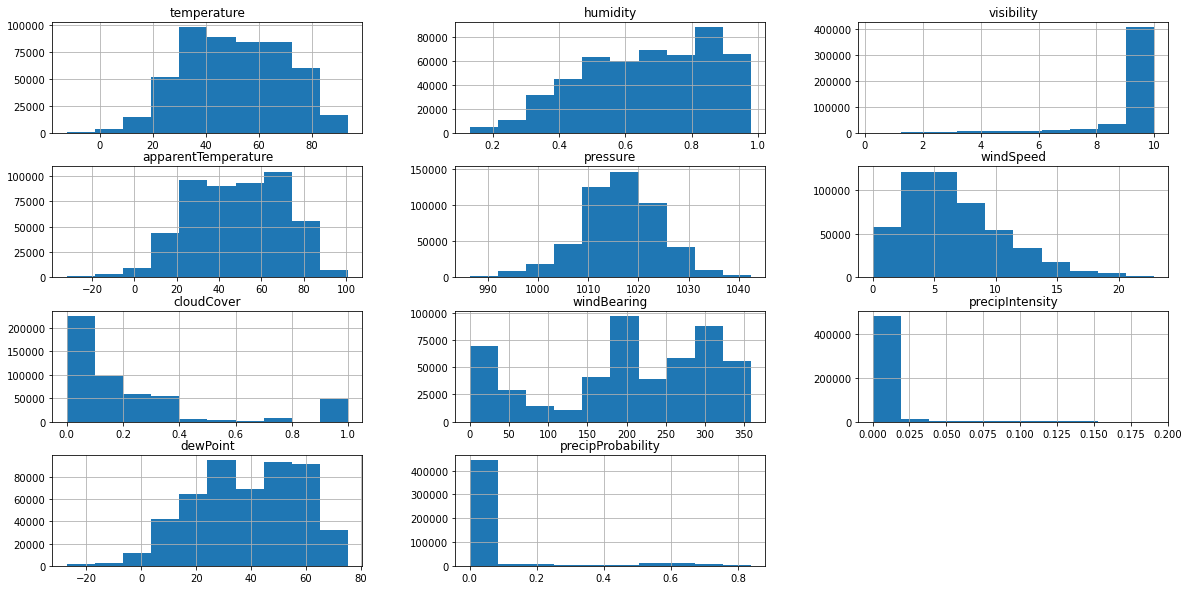

In [57]:
weather_data.hist(figsize=(20, 10))
plt.show()

# EDA-Bivariate Analysis

<h3> Mean Energy Consumption By Rooms

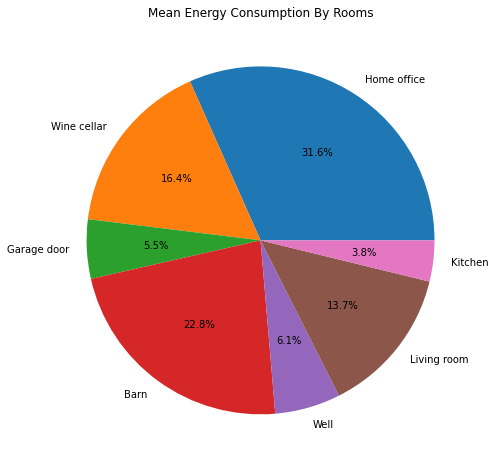

In [58]:
usage_per_month.mean().filter(['Home office','Wine cellar', 'Garage door', 'Barn', 'Well','Living room', 
                               'Kitchen']).plot.pie(figsize=(8,8),ylabel='',autopct='%1.1f%%',
                                                    title='Mean Energy Consumption By Rooms')
plt.show()

- Most of the energy is consumed by  HomeOffice, Wine Cellar, Barn

<h3> Mean Energy Consumption By Appliances

<AxesSubplot:title={'center':'Mean Energy Consumption By Appliances'}>

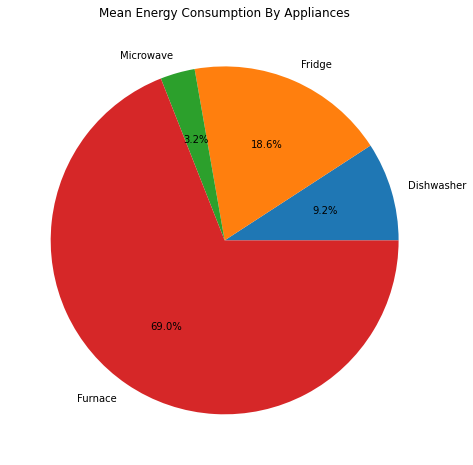

In [59]:
usage_per_month.mean().filter(['Dishwasher', 'Fridge','Microwave', 'Furnace']).plot.pie(figsize=(8,8),ylabel='',autopct='%1.1f%%',title='Mean Energy Consumption By Appliances')

    Most of the energy is consumed by furnace,fridge

# Analyzing effect of weather on solar energy generated. 

In [60]:
df_resampled=df.resample('D').sum()

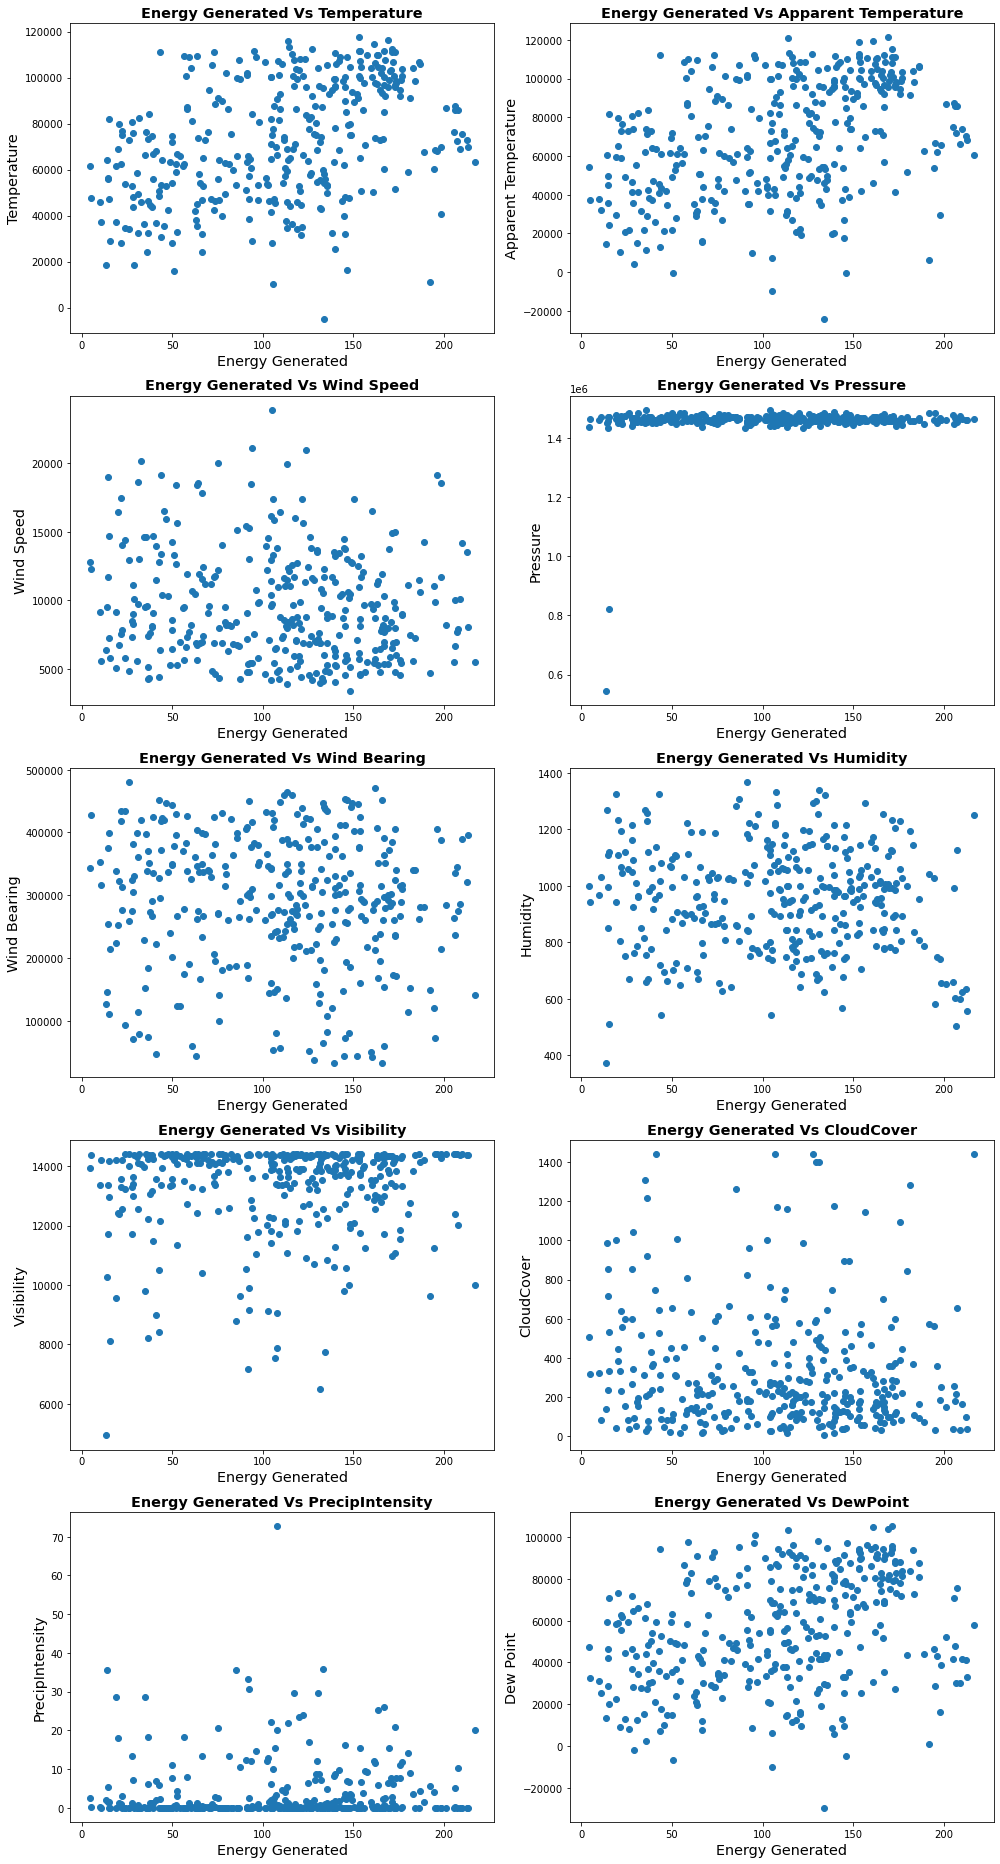

In [61]:
fig, axs = plt.subplots(5, 2,figsize=(14,26))
axs[0, 0].scatter(x = df_resampled['Generated'], y = df_resampled['temperature'])
axs[0, 0].set_title('Energy Generated Vs Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[0, 0].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[0, 0].set_ylabel("Temperature",fontsize = 'x-large')

axs[0, 1].scatter(x = df_resampled['Generated'], y = df_resampled['apparentTemperature'])
axs[0, 1].set_title('Energy Generated Vs Apparent Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[0, 1].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[0, 1].set_ylabel("Apparent Temperature",fontsize = 'x-large')

axs[1, 0].scatter(x = df_resampled['Generated'], y = df_resampled['windSpeed'])
axs[1, 0].set_title('Energy Generated Vs Wind Speed',fontsize = 'x-large',fontweight = 'bold')
axs[1, 0].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[1, 0].set_ylabel("Wind Speed",fontsize = 'x-large')

axs[1, 1].scatter(x = df_resampled['Generated'], y = df_resampled['pressure'])
axs[1, 1].set_title('Energy Generated Vs Pressure',fontsize = 'x-large',fontweight = 'bold')
axs[1, 1].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[1, 1].set_ylabel("Pressure",fontsize = 'x-large')


axs[2, 0].scatter(x = df_resampled['Generated'], y = df_resampled['windBearing'])
axs[2, 0].set_title('Energy Generated Vs Wind Bearing',fontsize = 'x-large',fontweight = 'bold')
axs[2, 0].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[2, 0].set_ylabel("Wind Bearing",fontsize = 'x-large')

axs[2, 1].scatter(x = df_resampled['Generated'], y = df_resampled['humidity'])
axs[2, 1].set_title('Energy Generated Vs Humidity',fontsize = 'x-large',fontweight = 'bold')
axs[2, 1].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[2, 1].set_ylabel("Humidity",fontsize = 'x-large')

axs[3, 0].scatter(x = df_resampled['Generated'], y = df_resampled['visibility'])
axs[3, 0].set_title('Energy Generated Vs Visibility',fontsize = 'x-large',fontweight = 'bold')
axs[3, 0].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[3, 0].set_ylabel("Visibility",fontsize = 'x-large')

axs[3, 1].scatter(x = df_resampled['Generated'], y = df_resampled['cloudCover'])
axs[3, 1].set_title('Energy Generated Vs CloudCover',fontsize = 'x-large',fontweight = 'bold')
axs[3, 1].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[3, 1].set_ylabel("CloudCover",fontsize = 'x-large')


axs[4, 0].scatter(x = df_resampled['Generated'], y = df_resampled['precipIntensity'])
axs[4, 0].set_title('Energy Generated Vs PrecipIntensity',fontsize = 'x-large',fontweight = 'bold')
axs[4, 0].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[4, 0].set_ylabel("PrecipIntensity",fontsize = 'x-large')


axs[4, 1].scatter(x = df_resampled['Generated'], y = df_resampled['dewPoint'])
axs[4, 1].set_title('Energy Generated Vs DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[4, 1].set_xlabel("Energy Generated",fontsize = 'x-large')
axs[4, 1].set_ylabel("Dew Point",fontsize = 'x-large')

plt.tight_layout()



- Other than apparrent temperature,Temperature, dewpoint, there doesnt seem to be a significant correlation on solar energy generated.
- We can confirm it below using a heat map. 

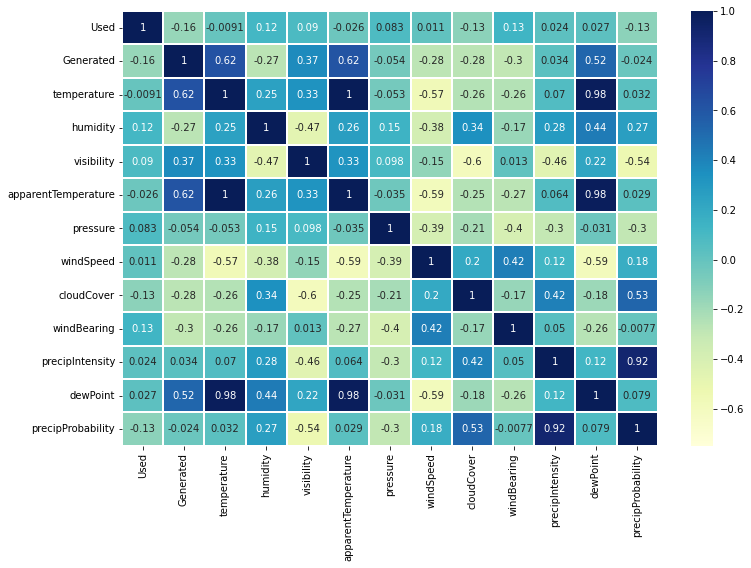

In [62]:
weather_data1=df.filter(items=['Used','Generated','temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'])
weather_data1 = weather_data1.resample('W').mean()
corrmatrix = weather_data1.corr()
plt.subplots(figsize = (12,8))
sns.heatmap(corrmatrix,vmin= -0.75,vmax = 1,annot=True,linewidth = 0.2,cmap = 'YlGnBu')
plt.show()

<h2> Analyzing effect of sky condition (Summary) on Energy Used

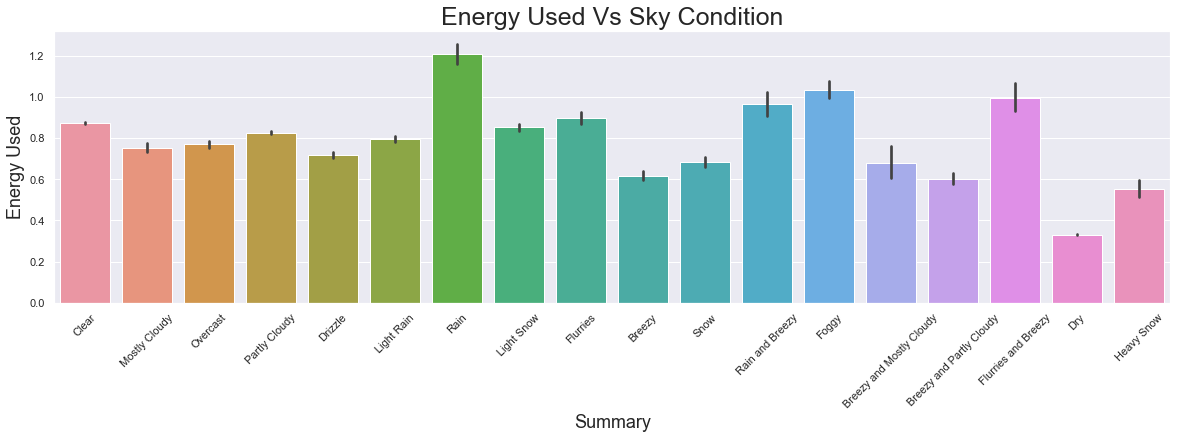

In [63]:
sns.set(rc={'figure.figsize':(20,5)}) #set width and height
ax=sns.barplot(x=df['summary'], y=df['Used'])
ax.set_xlabel('Summary', fontsize=18)
plt.xticks(rotation=45)
ax.set_ylabel('Energy Used', fontsize=18)
ax.set_title('Energy Used Vs Sky Condition', fontsize=25)
plt.show()

- Energy is consumed more during Rain, Foggy, Breezy and Mostly Cloudly.

# Analyzing effect of weather by Room type. 

 Here we are plotting rooms 'Home office','Wine cellar', 'Garage door', 'Barn', 'Well','Living room', 'Kitchen' against the selected weather conditions - temperature and dewPoint

<h3> 1.Temperature

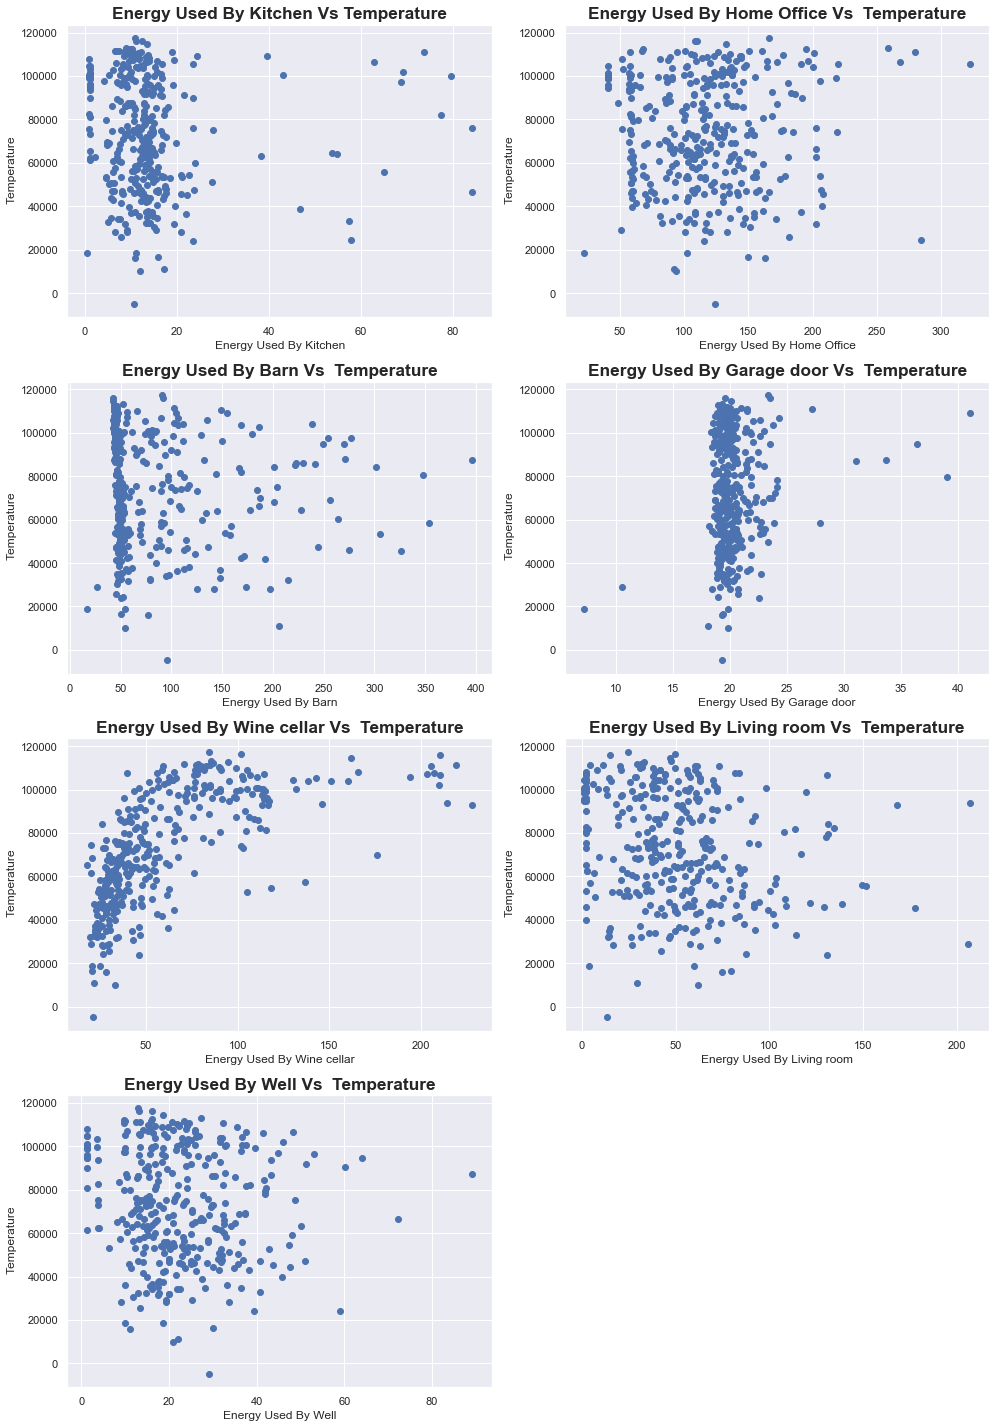

In [64]:
fig, axs = plt.subplots(4, 2,figsize=(14,20))
axs[0, 0].scatter(x = df_resampled['Kitchen' ], y = df_resampled['temperature'])
axs[0, 0].set_title('Energy Used By Kitchen Vs Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[0, 0].set_xlabel("Energy Used By Kitchen")

axs[0, 1].scatter(x = df_resampled['Home office' ], y = df_resampled['temperature'])
axs[0, 1].set_title('Energy Used By Home Office Vs  Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[0, 1].set_xlabel("Energy Used By Home Office")

axs[1, 0].scatter(x = df_resampled['Barn'], y = df_resampled['temperature'])
axs[1, 0].set_title('Energy Used By Barn Vs  Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[1, 0].set_xlabel("Energy Used By Barn")

axs[1, 1].scatter(x = df_resampled['Garage door'], y = df_resampled['temperature'])
axs[1, 1].set_title('Energy Used By Garage door Vs  Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[1, 1].set_xlabel("Energy Used By Garage door")

axs[2, 0].scatter(x = df_resampled['Wine cellar'], y = df_resampled['temperature'])
axs[2, 0].set_title('Energy Used By Wine cellar Vs  Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[2, 0].set_xlabel("Energy Used By Wine cellar")

axs[2, 1].scatter(x = df_resampled['Living room'], y = df_resampled['temperature'])
axs[2, 1].set_title('Energy Used By Living room Vs  Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[2, 1].set_xlabel("Energy Used By Living room")

axs[3, 0].scatter(x = df_resampled['Well'], y = df_resampled['temperature'])
axs[3, 0].set_title('Energy Used By Well Vs  Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[3, 0].set_xlabel("Energy Used By Well")

axs[3,1].set_axis_off()

for ax in axs.flat:
    ax.set( ylabel=" Temperature")

plt.tight_layout()



Energy consumption of wine cellar is effected by temperature.

<h3> 2.DewPoint

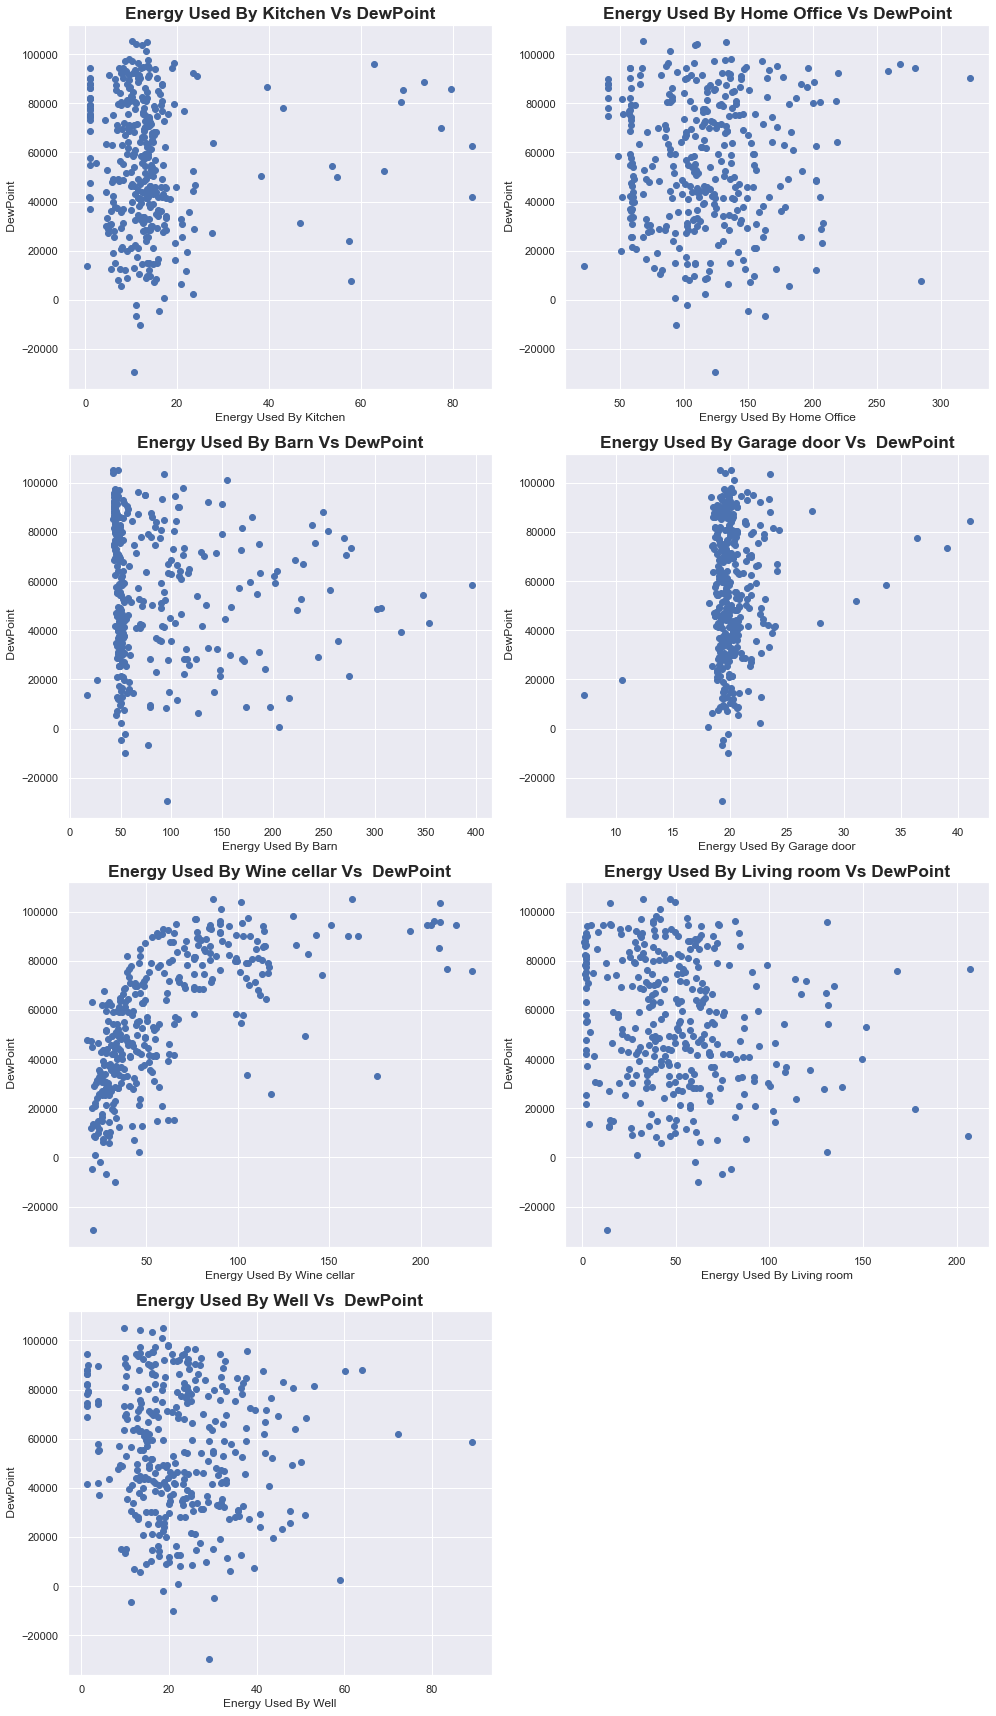

In [65]:
fig, axs = plt.subplots(4, 2,figsize=(14,24))
axs[0, 0].scatter(x = df_resampled['Kitchen' ], y = df_resampled['dewPoint'])
axs[0, 0].set_title('Energy Used By Kitchen Vs DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[0, 0].set_xlabel("Energy Used By Kitchen")

axs[0, 1].scatter(x = df_resampled['Home office' ], y = df_resampled['dewPoint'])
axs[0, 1].set_title('Energy Used By Home Office Vs DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[0, 1].set_xlabel("Energy Used By Home Office")

axs[1, 0].scatter(x = df_resampled['Barn'], y = df_resampled['dewPoint'])
axs[1, 0].set_title('Energy Used By Barn Vs DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[1, 0].set_xlabel("Energy Used By Barn")

axs[1, 1].scatter(x = df_resampled['Garage door'], y = df_resampled['dewPoint'])
axs[1, 1].set_title('Energy Used By Garage door Vs  DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[1, 1].set_xlabel("Energy Used By Garage door")

axs[2, 0].scatter(x = df_resampled['Wine cellar'], y = df_resampled['dewPoint'])
axs[2, 0].set_title('Energy Used By Wine cellar Vs  DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[2, 0].set_xlabel("Energy Used By Wine cellar")

axs[2, 1].scatter(x = df_resampled['Living room'], y = df_resampled['dewPoint'])
axs[2, 1].set_title('Energy Used By Living room Vs DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[2, 1].set_xlabel("Energy Used By Living room")

axs[3, 0].scatter(x = df_resampled['Well'], y = df_resampled['dewPoint'])
axs[3, 0].set_title('Energy Used By Well Vs  DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[3, 0].set_xlabel("Energy Used By Well")

axs[3,1].set_axis_off()

for ax in axs.flat:
    ax.set( ylabel=" DewPoint")

plt.tight_layout()

- Energy consumption of wine cellar is effected by dewpoint.

# Analyzing effect of weather on Appliances

Here we are plotting Appliances 'Dishwasher', 'Fridge','Microwave', 'Furnace' against the selected weather conditions - temperature and dewPoint

<h3> 1.Temperature

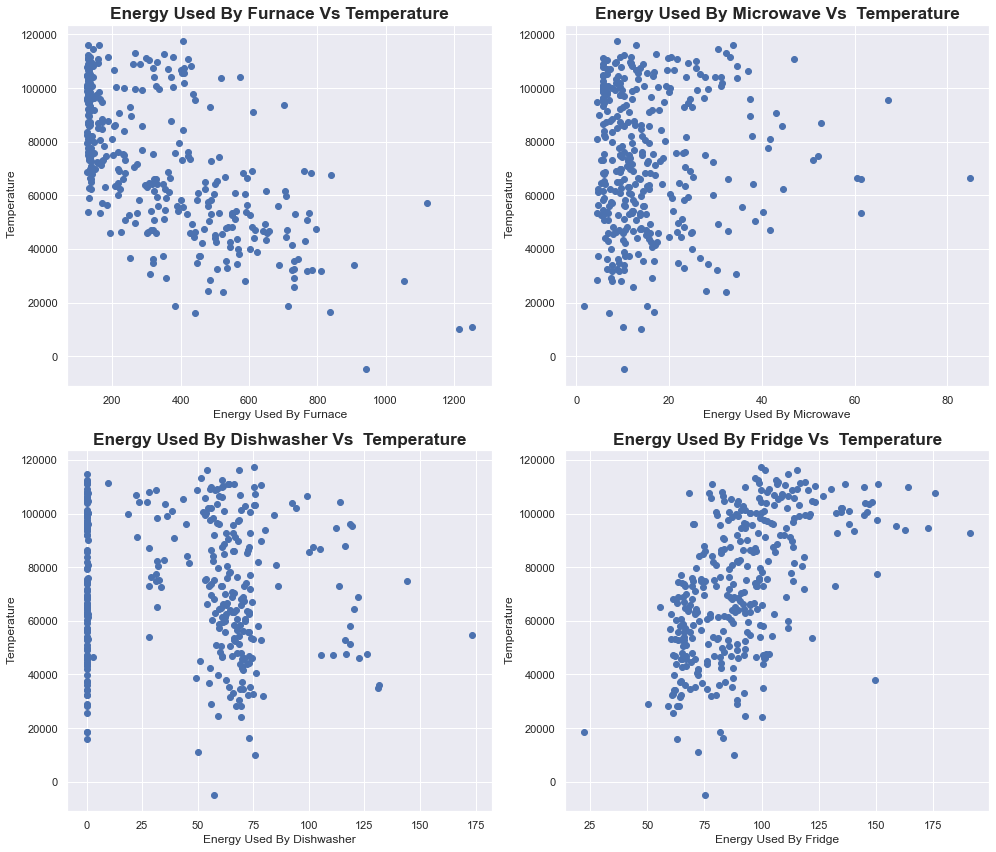

In [66]:
fig, axs = plt.subplots(2, 2,figsize=(14,12))
axs[0, 0].scatter(x = df_resampled['Furnace' ], y = df_resampled['temperature'])
axs[0, 0].set_title('Energy Used By Furnace Vs Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[0, 0].set_xlabel("Energy Used By Furnace")

axs[0, 1].scatter(x = df_resampled['Microwave'], y = df_resampled['temperature'])
axs[0, 1].set_title('Energy Used By Microwave Vs  Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[0, 1].set_xlabel("Energy Used By Microwave")

axs[1, 0].scatter(x = df_resampled['Dishwasher'], y = df_resampled['temperature'])
axs[1, 0].set_title('Energy Used By Dishwasher Vs  Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[1, 0].set_xlabel("Energy Used By Dishwasher")

axs[1, 1].scatter(x = df_resampled['Fridge'], y = df_resampled['temperature'])
axs[1, 1].set_title('Energy Used By Fridge Vs  Temperature',fontsize = 'x-large',fontweight = 'bold')
axs[1, 1].set_xlabel("Energy Used By Fridge")


for ax in axs.flat:
    ax.set( ylabel=" Temperature")

plt.tight_layout()


- Temperature has no effect on diswasher and microwave energy consumption 
- Furance - Energy consumption reduces as temperature increases
- Fridge -Energy consumption increases as temperature increases

<h3>2.DewPoint

FileNotFoundError: [Errno 2] No such file or directory: '/Users/saras/Desktop/Project_SmartHome/EnergyUsedbyAppliance_Vs_dewPoint.png'

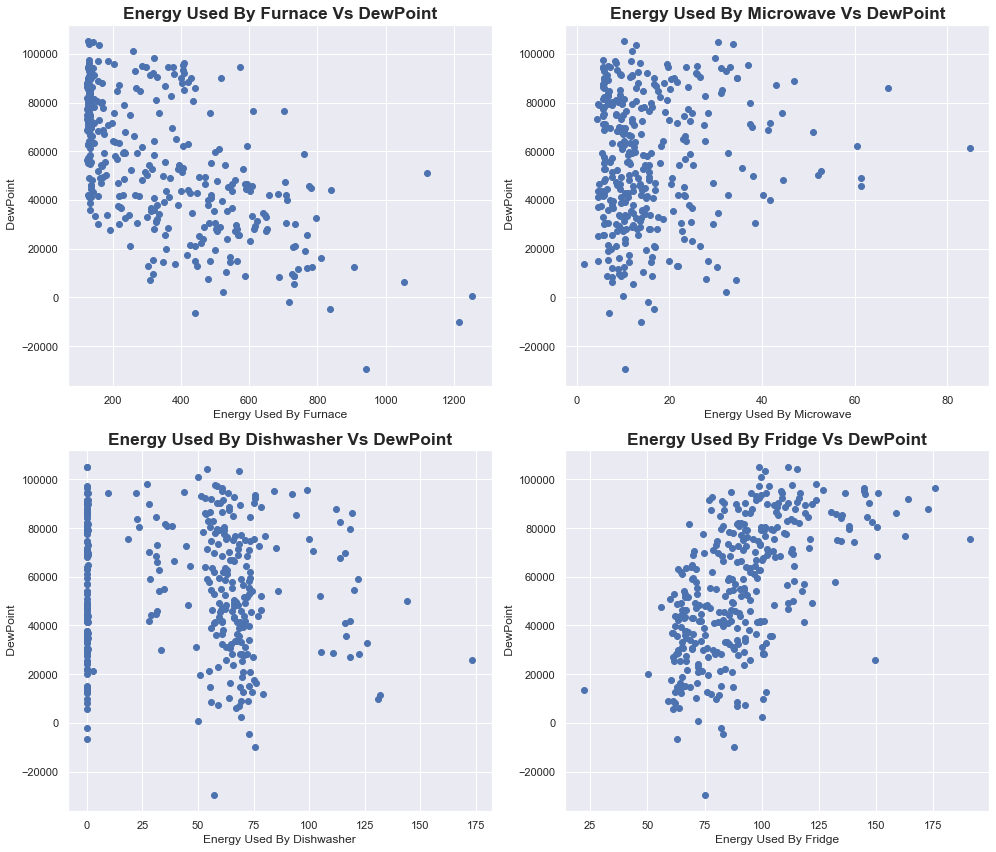

In [67]:
fig, axs = plt.subplots(2, 2,figsize=(14,12))
axs[0, 0].scatter(x = df_resampled['Furnace' ], y = df_resampled['dewPoint'])
axs[0, 0].set_title('Energy Used By Furnace Vs DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[0, 0].set_xlabel("Energy Used By Furnace")

axs[0, 1].scatter(x = df_resampled['Microwave'], y = df_resampled['dewPoint'])
axs[0, 1].set_title('Energy Used By Microwave Vs DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[0, 1].set_xlabel("Energy Used By Microwave")

axs[1, 0].scatter(x = df_resampled['Dishwasher'], y = df_resampled['dewPoint'])
axs[1, 0].set_title('Energy Used By Dishwasher Vs DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[1, 0].set_xlabel("Energy Used By Dishwasher")

axs[1, 1].scatter(x = df_resampled['Fridge'], y = df_resampled['dewPoint'])
axs[1, 1].set_title('Energy Used By Fridge Vs DewPoint',fontsize = 'x-large',fontweight = 'bold')
axs[1, 1].set_xlabel("Energy Used By Fridge")


for ax in axs.flat:
    ax.set( ylabel=" DewPoint")

plt.tight_layout()
fname = "/Users/saras/Desktop/Project_SmartHome/EnergyUsedbyAppliance_Vs_dewPoint.png"
plt.savefig(fname, dpi=50)

- DewPoint has no effect on diswasher and microwave energy consumption
- Furance - Energy consumption reduces as Dewpoint increases
- Fridge -Energy consumption increases as DewPoint increases